### Import Relevant Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Generate Master DF

In [16]:
master_df = pd.read_csv('Consumer_Complaints.csv')

/Users/seanmcalevey/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
master_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,10/01/2019,"Payday loan, title loan, or personal loan",Installment loan,Struggling to pay your loan,NaN,NaN,Company believes it acted appropriately as aut...,"Atlas Credit Company, Inc.",TX,75703,NaN,Consent not provided,Web,10/01/2019,Closed with explanation,Yes,NaN,3391722
1,10/01/2019,Debt collection,Other debt,False statements or representation,Attempted to collect wrong amount,NaN,Company has responded to the consumer and the ...,"ProCollect, Inc",TX,79936,Servicemember,Consent not provided,Web,10/01/2019,Closed with explanation,Yes,NaN,3391649
2,10/01/2019,Debt collection,Auto debt,Written notification about debt,Notification didn't disclose it was an attempt...,NaN,NaN,NAVY FEDERAL CREDIT UNION,CA,91915,NaN,NaN,Web,10/01/2019,In progress,Yes,NaN,3391379
3,10/01/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,OKLAHOMA STUDENT LOAN AUTHORITY,IN,47130,NaN,NaN,Web,10/01/2019,Closed with explanation,Yes,NaN,3391378
4,10/01/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company disputes the facts presented in the co...,"Eastern Account Systems of Connecticut, Inc.",CT,06401,NaN,Other,Web,10/01/2019,Closed with explanation,Yes,NaN,3391434


### 1) Generate Word Cloud for Most Common Issues

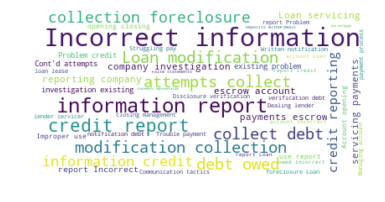

In [90]:
text = ' '.join(review for review in master_df['Issue'])

wordcloud = WordCloud(max_font_size=300, max_words=50, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

### 2) Bar Graph for "Submitted via" to See from where CFPB is Receiving the Data

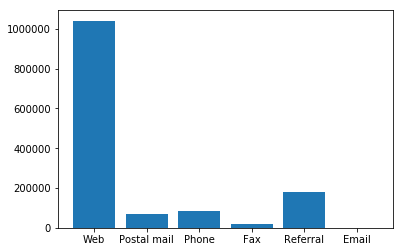

In [45]:
submitted_via = {}

for word in master_df['Submitted via']:
    if word in submitted_via:
        submitted_via[word] += 1
    else:
        submitted_via[word] = 1

plt.bar(range(len(submitted_via)), list(submitted_via.values()), align='center')
plt.xticks(range(len(submitted_via)), list(submitted_via.keys()))

plt.show()